In [3]:
from scipy import signal
from scipy import misc
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from challenge.ImageGen import *
from solver.CentImage import *


np.random.seed(11412328)

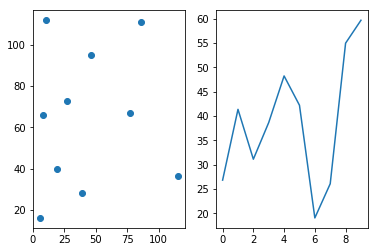

In [5]:
# Make a set of points, [X ; Y ; Magnitude
star_cords = genStarCoords()

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(star_cords[:,0], star_cords[:,1])
ax2 = fig.add_subplot(122)
ax2.plot(star_cords[:,2])

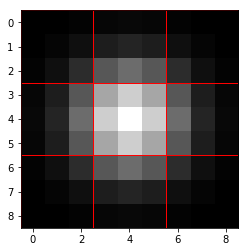

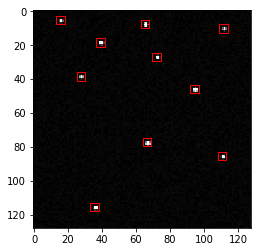

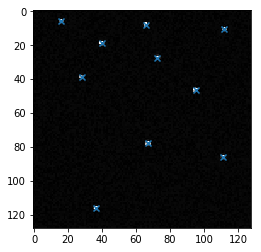

In [6]:
gausKern = starGauss(OvScale)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(gausKern, cmap='gray')

for ii in range(0, Body_Width*OvScale, OvScale):
        for jj in range(0, Body_Width*OvScale, OvScale):
                r = patches.Rectangle((ii-0.5,jj-0.5), OvScale, OvScale,linewidth=1,edgecolor='r',facecolor='none')
                ax1.add_patch(r)


final = genImage(star_cords)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(final, cmap='gray')
for y,x,m in star_cords:
    r = patches.Rectangle((x-Body_Width,y-Body_Width), Body_Width*2-1, Body_Width*2-1,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(r)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(final, cmap='gray')
ax1.scatter(star_cords[:,1], star_cords[:,0],marker='x')

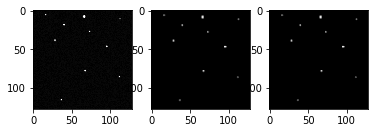

In [7]:

gausKern = gkern(10,5)

fig = plt.figure()

filtered = final
ax1 = fig.add_subplot(131)
ax1.imshow(filtered, cmap='gray')

F1 = filterImage1(final)

F2 = filterImage2(final)

ax1 = fig.add_subplot(132)
ax1.imshow(F1, cmap='gray')

ax1 = fig.add_subplot(133)
ax1.imshow(F2, cmap='gray')


In [8]:
# Stats
F = F2
print("Max: %f" % np.max(F))
print("Avg: %f" % np.mean(F))
print("Median: %f" % np.median(F))

Max: 244.525299
Avg: 0.656416
Median: 0.000000


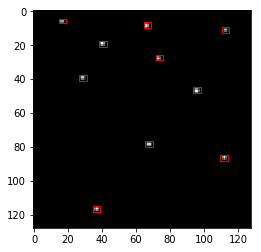

In [9]:
blocks = calcBlocks(F)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(F, cmap='gray')

for ii in range(len(blocks)):
    x0, y0, x1, y1 = blocks[ii]
    r = patches.Rectangle((x0-0.5,y0-0.5),x1-x0+0.5, y1-y0+0.5,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(r)

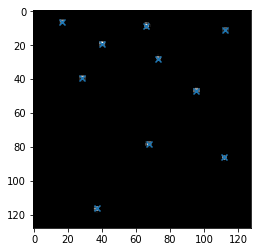

In [10]:
cents = calcCents(F, blocks)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(F, cmap='gray')
ax1.scatter(cents[:,1], cents[:,0],marker='x')

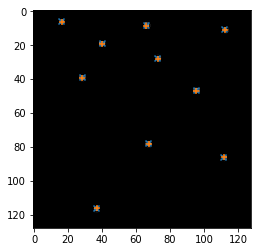

In [11]:
c = cents
a = star_cords

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(F, cmap='gray')
ax1.scatter(star_cords[:,1], star_cords[:,0],marker='x')
ax1.scatter(c[:,1], c[:,0],marker='+')


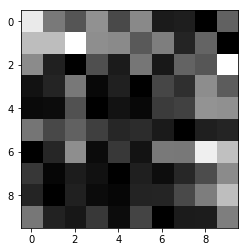

In [12]:
delts = np.zeros((Points, Points))
for ii in range(Points):
    for jj in range(Points):
        delts[ii,jj] = np.sum(np.square(np.subtract(a[ii,:2], c[jj,:2])))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(delts,cmap='gray')

0.4428416335407025
0 8
1 9
2 2
3 5
4 3
5 7
6 0
7 4
8 1
9 6


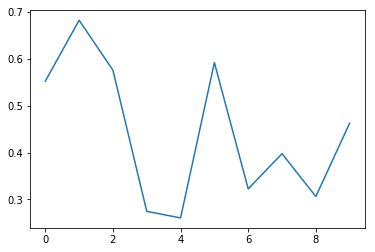

In [13]:
from scipy.optimize import linear_sum_assignment

rindex, cindex = linear_sum_assignment(delts)
error = np.mean(delts[rindex,cindex])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(delts[rindex,cindex])

print(error)
for a,b in zip(rindex,cindex):
    print(a,b)